### Projeto 1: Classificação Binária - Brest Cancer

#### Etapa 1: Importação das bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
import torch
torch.__version__

'1.13.0+cpu'

In [3]:
import torch.nn as nn

#### Etapa 2: Base de dados

In [4]:
# Mesmo número aleatório
np.random.seed(123)
torch.manual_seed(123) # Mesmos pesos


In [5]:
previsores = pd.read_csv('Arquivos/entradas_breast.csv')
classes = pd.read_csv('Arquivos/saidas_breast.csv')

In [6]:
previsores.shape

(569, 30)

In [7]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classes, test_size=0.25)

In [8]:
classe_teste.shape

(143, 1)

#### Etapa 3: Transformação dos dados para tensores

In [9]:
type(previsores_treinamento)

pandas.core.frame.DataFrame

In [10]:
type(np.array(previsores_treinamento))

numpy.ndarray

In [11]:
# Numpy array para tensores
previsores_treinamento = torch.tensor(np.array(previsores_treinamento),dtype=torch.float)

In [12]:
classe_treinamento = torch.tensor(np.array(classe_treinamento),dtype=torch.float)

In [13]:
# Cria um dataset com previsores e classe treinamento, identificando quem é o previsor e quem é a classe
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)

In [14]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [15]:
# Pytorch trabalha com mini batches, por isso precisa de um dataLoader 
# (significa que eu enviarei 10 registros por rodada para carregar os pesos)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

#### Etapa 4: Construção do modelo

In [16]:
# 30 neuronios na camada de entrada -> 2 camadas ocultas:  30 -> 16n -> 16n -> 1 
# (entradas + saídas)/2 = (30+1)/2 = 16

#Sequential -> Sequencia de camadas
classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=16), # Camada tipo densa, liga em todas os neuronios
    nn.ReLU(), # Função de ativação aplicada nos primeiros 16 neuronios
    nn.Linear(16, 16), # Nova ligação
    nn.ReLU(),
    nn.Linear(16,1),
    nn.Sigmoid()
)

In [17]:
classificador.parameters # da pra tirar o bias

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [18]:
criterion = nn.BCELoss() # Erro

In [19]:
# Otimizador = Adam, usando os parametros, o learning rate, 
# weight_decay que é a cada número X de épocas ele diminui o LR pra chegar ao mínimo global
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

#### Etapa 5: Treinamento do modelo

In [20]:
# Atualiza os pesos nesse for
# 426 registros atualizados de 10 em 10, ou seja vai ter um ajuste de pesos 42,6x em cada época do for, ou seja 4.260x
for epoch in range(100):
    running_loss = 0.
    
    for data in train_loader:
        inputs, labels = data # input entradas, labels dados reais | data roda cada batch
        optimizer.zero_grad() # zera os valores acumulados, pra poder apontar pra uma nova direção no ajuste dos pesos
        
        outputs = classificador(inputs) #classificador.forward(inputs)
        loss = criterion(outputs, labels) # Calculo do erro
        #print('Loss')

        loss.backward()
        optimizer.step() # Vai atualizar os pesos
        running_loss += loss.item() #loss.item pega o valor do erro
    print(f'Época {epoch+1}: perda {running_loss/len(train_loader)}')


Época 1: perda 10.783365549043168
Época 2: perda 2.848594320894674
Época 3: perda 1.6747931701152823
Época 4: perda 1.114138968115629
Época 5: perda 0.6399635447319164
Época 6: perda 0.6375325613243635
Época 7: perda 0.5806612684283146
Época 8: perda 0.5545990104938663
Época 9: perda 0.5561710509449936
Época 10: perda 0.5332180665329446
Época 11: perda 0.5579720432328623
Época 12: perda 0.5381610570258872
Época 13: perda 0.5293807910625324
Época 14: perda 0.3322672736506129
Época 15: perda 0.5136039808045986
Época 16: perda 0.3553202749598165
Época 17: perda 0.49602397141415017
Época 18: perda 0.3320764961630799
Época 19: perda 0.2934870313159948
Época 20: perda 0.2504585366262946
Época 21: perda 0.29526589464309605
Época 22: perda 0.4988823265357073
Época 23: perda 0.4724078536640073
Época 24: perda 0.45883112054231556
Época 25: perda 0.2754426968478879
Época 26: perda 0.23398832794885302
Época 27: perda 0.2637262643249922
Época 28: perda 0.24135816097259521
Época 29: perda 0.28275211

#### Etapa 6: Visualização dos pesos

In [21]:
params = list(classificador.parameters())
params

[Parameter containing:
 tensor([[-6.9537e-02, -7.6251e-02, -1.7509e-01,  5.4204e-02, -1.5442e-01,
           1.0065e-01, -1.3578e-01, -1.2356e-01, -2.2725e-01,  1.9374e-01,
          -3.4267e-02,  5.8904e-02, -1.2563e-01, -8.7217e-02, -3.5901e-04,
          -2.2019e-01, -3.9123e-01, -1.2445e-02,  1.3856e-01,  2.4448e-03,
           1.4020e-01, -4.8890e-02, -3.3449e-02,  1.4495e-01,  4.9342e-01,
           1.2753e-01, -1.8688e-01,  3.9847e-02,  2.8978e-01,  4.1387e-02],
         [ 1.9539e-01,  2.0192e-01,  2.8234e-01,  9.1706e-02, -1.3019e-01,
          -7.7657e-02, -4.8287e-02, -1.3043e-01, -4.6018e-02,  2.6494e-01,
          -5.9741e-02, -9.3107e-02, -2.0819e-03,  1.8033e-01, -5.0927e-03,
          -9.2861e-02, -1.1140e-02,  1.9047e-01,  1.0000e-01, -1.4144e-02,
           9.8384e-02,  5.3950e-02,  1.8551e-01,  4.1831e-04, -1.6448e-02,
          -2.3621e-01, -1.6503e-01, -8.6718e-03, -6.3805e-02, -1.6640e-01],
         [-1.2157e-02, -4.5317e-02, -2.4382e-01, -1.0570e-01, -9.9634e-03,


In [22]:
pesos0 = params[0]
pesos0.shape

torch.Size([16, 30])

In [23]:
bias0 = params[1]
bias0.shape

torch.Size([16])

In [24]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [25]:
bias1 = params[3]
bias1.shape

torch.Size([16])

#### Etapa 7: Avaliação do modelo 

In [26]:
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [27]:
type(previsores_teste)

pandas.core.frame.DataFrame

In [28]:
previsores_teste = torch.tensor(np.array(previsores_teste), dtype=torch.float)

In [29]:
type(previsores_teste)

torch.Tensor

In [30]:
previsoes = classificador.forward(previsores_teste)

In [31]:
previsoes

tensor([[9.9343e-01],
        [1.0000e+00],
        [4.4810e-01],
        [9.6889e-01],
        [2.4190e-04],
        [8.5552e-01],
        [9.4859e-01],
        [9.9976e-01],
        [6.9172e-01],
        [6.2148e-01],
        [9.4319e-01],
        [9.9781e-01],
        [9.8115e-01],
        [9.9566e-01],
        [9.9528e-01],
        [8.4966e-01],
        [9.9589e-01],
        [1.0000e+00],
        [3.8435e-01],
        [9.9654e-01],
        [2.4737e-10],
        [1.3299e-02],
        [5.1388e-01],
        [1.0000e+00],
        [9.1471e-01],
        [5.1335e-03],
        [8.2585e-01],
        [1.0000e+00],
        [2.1750e-04],
        [9.9790e-01],
        [5.3644e-01],
        [9.9999e-01],
        [8.8585e-01],
        [9.8646e-01],
        [4.7128e-01],
        [9.9816e-01],
        [6.3675e-01],
        [9.9854e-01],
        [9.9834e-01],
        [2.1024e-05],
        [5.3622e-03],
        [9.4315e-01],
        [4.3994e-08],
        [3.4081e-01],
        [4.0611e-05],
        [6

In [32]:
type(previsoes)

torch.Tensor

In [33]:
previsoes = np.array(previsoes > 0.5) # maior que 0.5 é um menor é 0


In [34]:
previsoes

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [35]:
taxa_acerto = accuracy_score(classe_teste, previsoes)
taxa_acerto

0.9020979020979021

In [36]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[43, 11],
       [ 3, 86]], dtype=int64)

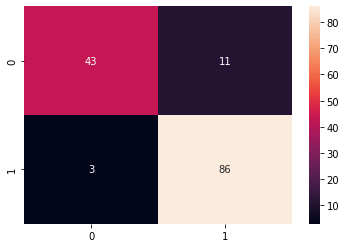

In [37]:
sns.heatmap(matriz, annot=True);